<a href="https://colab.research.google.com/github/Lucas-Siade/Data-Science/blob/main/DS%20-%20K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exemplo**

## **Bibliotecas**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

## **Dataset**

In [4]:
datasetKMeans = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Dataset - Iris.csv")

#DEFINIÇÃO DAS COLUNAS
datasetKMeans.drop(['Id'], axis=1, inplace=True)

datasetKMeans.rename(columns={
    'SepalLengthCm': 'Comprimento da Sépala',
    'SepalWidthCm': 'Largura da Sépala',
    'PetalLengthCm': 'Comprimento da Pétala',
    'PetalWidthCm': 'Largura da Pétala',
    'Species': 'Espécie',
}, inplace=True)

display(datasetKMeans.head())

,Comprimento da Sépala,Largura da Sépala,Comprimento da Pétala,Largura da Pétala,Espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


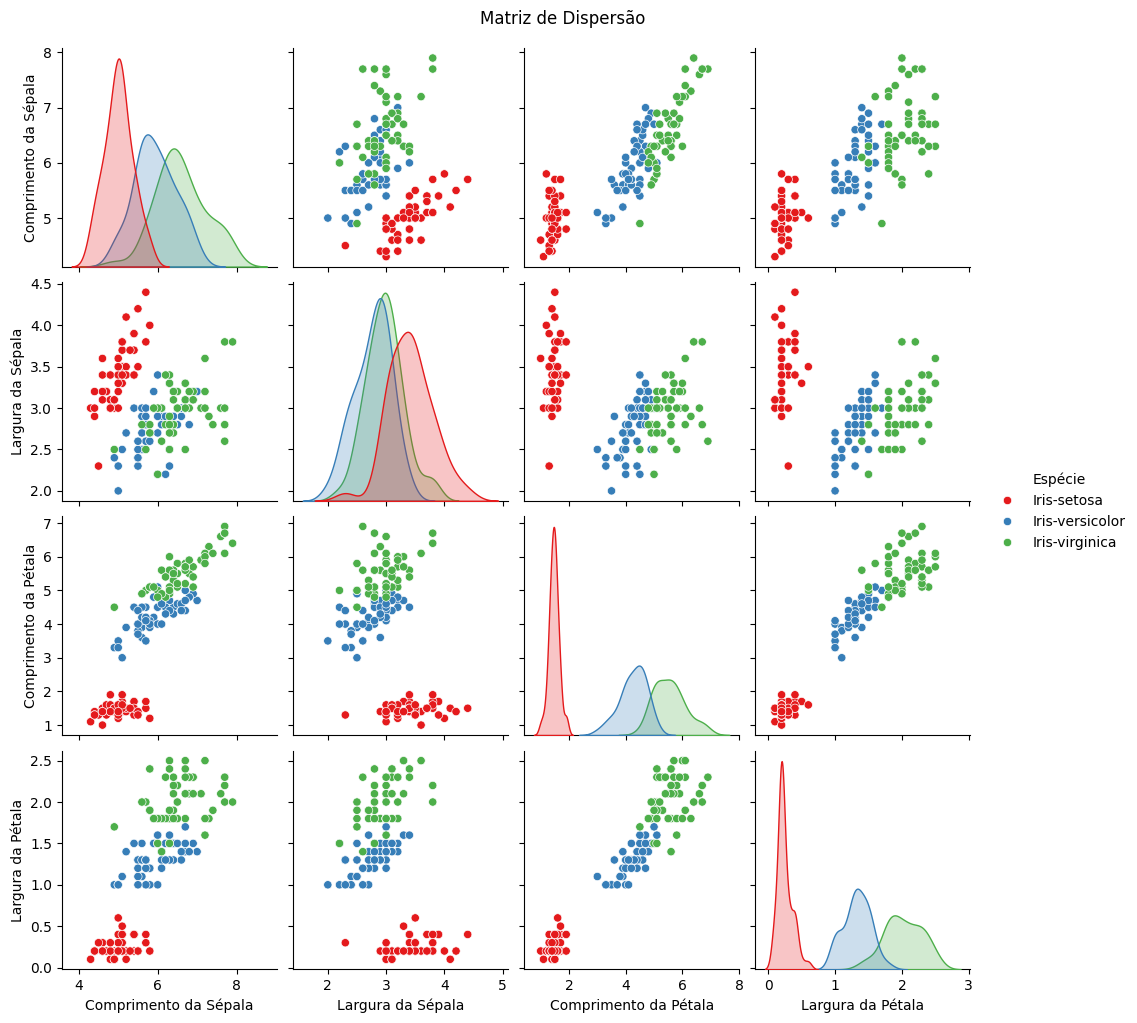

In [5]:
sns.pairplot(datasetKMeans, hue='Espécie', palette='Set1')
plt.suptitle('Matriz de Dispersão', y=1.02)
plt.show()

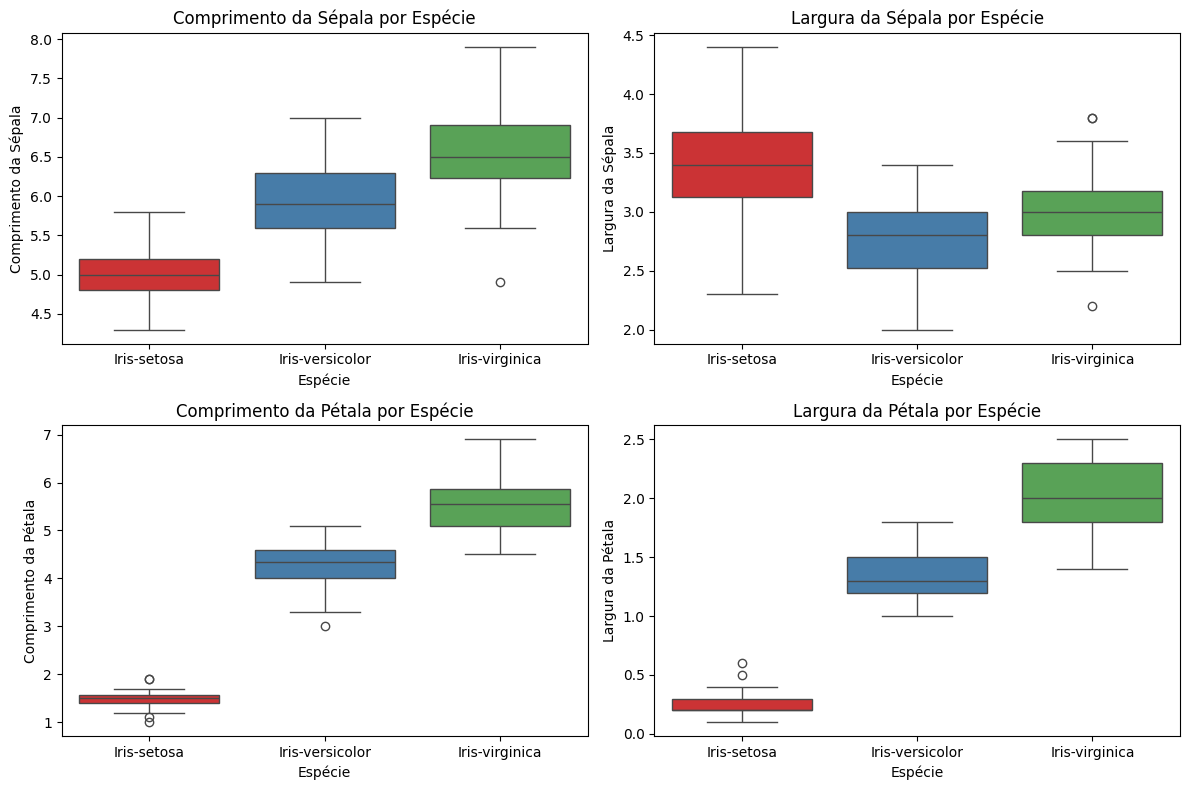

In [6]:
plt.figure(figsize=(12, 8))

for i, coluna in enumerate(datasetKMeans.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=datasetKMeans, x='Espécie', y=coluna, hue='Espécie', palette='Set1', legend=False)
    plt.title(f'{coluna} por Espécie')

plt.tight_layout()
plt.show()

In [7]:
#FUNÇÃO PARA REMOVER OUTLIERS
def remover_outliers_por_categoria(dataset, coluna_valor, coluna_categoria):
    datasetArrumado = pd.DataFrame()

    for categoria in dataset[coluna_categoria].unique():
        grupo = dataset[dataset[coluna_categoria] == categoria]

        Q1 = grupo[coluna_valor].quantile(0.25)
        Q3 = grupo[coluna_valor].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        grupo_filtrado = grupo[(grupo[coluna_valor] >= limite_inferior) & (grupo[coluna_valor] <= limite_superior)]
        datasetArrumado = pd.concat([datasetArrumado, grupo_filtrado])

    return datasetArrumado

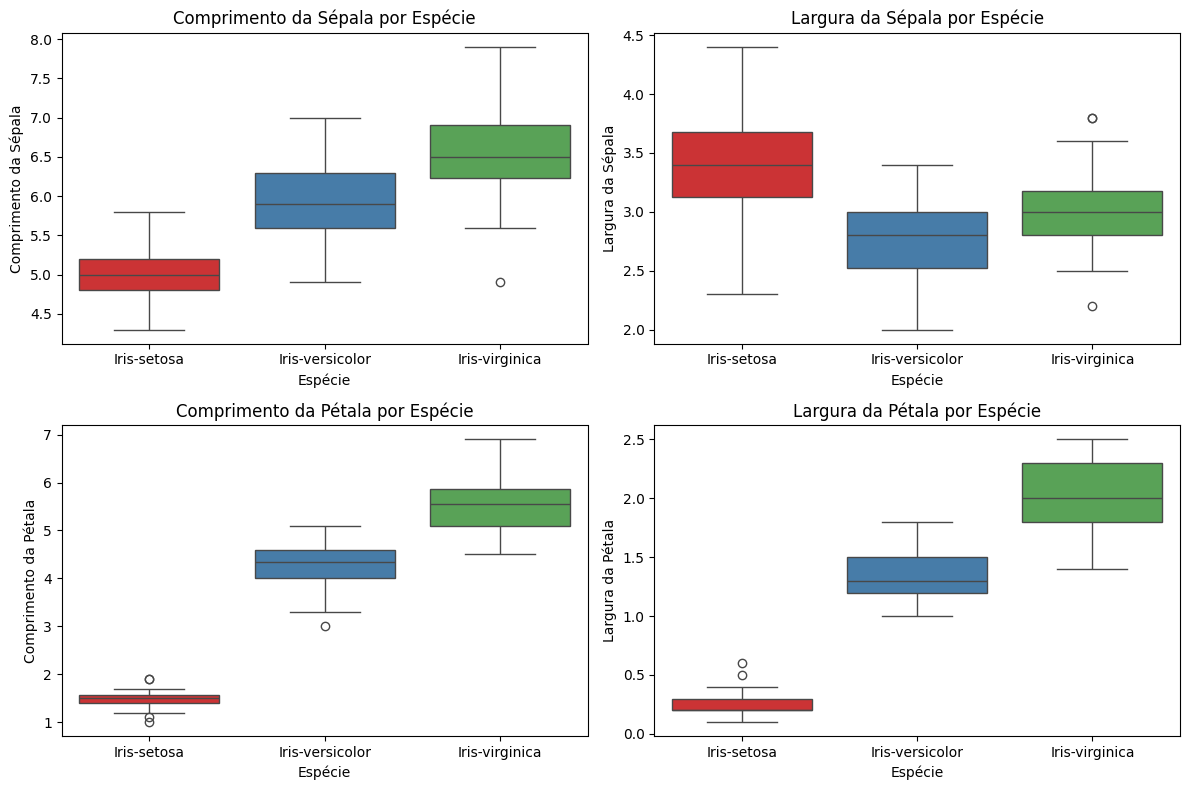

In [8]:
datasetKMeansArrumado = datasetKMeans.copy()

colunas = ['Comprimento da Sépala', 'Largura da Sépala',
           'Comprimento da Pétala', 'Largura da Pétala']

for coluna in colunas:
    datasetKMeansArrumado = remover_outliers_por_categoria(datasetKMeansArrumado, coluna, 'Espécie')

plt.figure(figsize=(12, 8))
for i, coluna in enumerate(datasetKMeansArrumado.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=datasetKMeans, x='Espécie', y=coluna, hue='Espécie', palette='Set1', legend=False)
    plt.title(f'{coluna} por Espécie')
plt.tight_layout()
plt.show()

## **Modelo**

In [9]:
#DEFINIR VARIÁVEIS
XKMeans = datasetKMeansArrumado.drop(["Espécie"], axis=1)

#TREINO DO MODELO
modelKMeans = KMeans(n_clusters=3, random_state=42)
YKMeans = modelKMeans.fit_predict(XKMeans)

In [10]:
display(pd.DataFrame(modelKMeans.cluster_centers_, columns=XKMeans.columns))

,Comprimento da Sépala,Largura da Sépala,Comprimento da Pétala,Largura da Pétala
0,5.931667,2.756667,4.415000,1.435000
1,6.850000,3.073684,5.742105,2.071053
2,5.031818,3.415909,1.454545,0.231818


## **Extra**

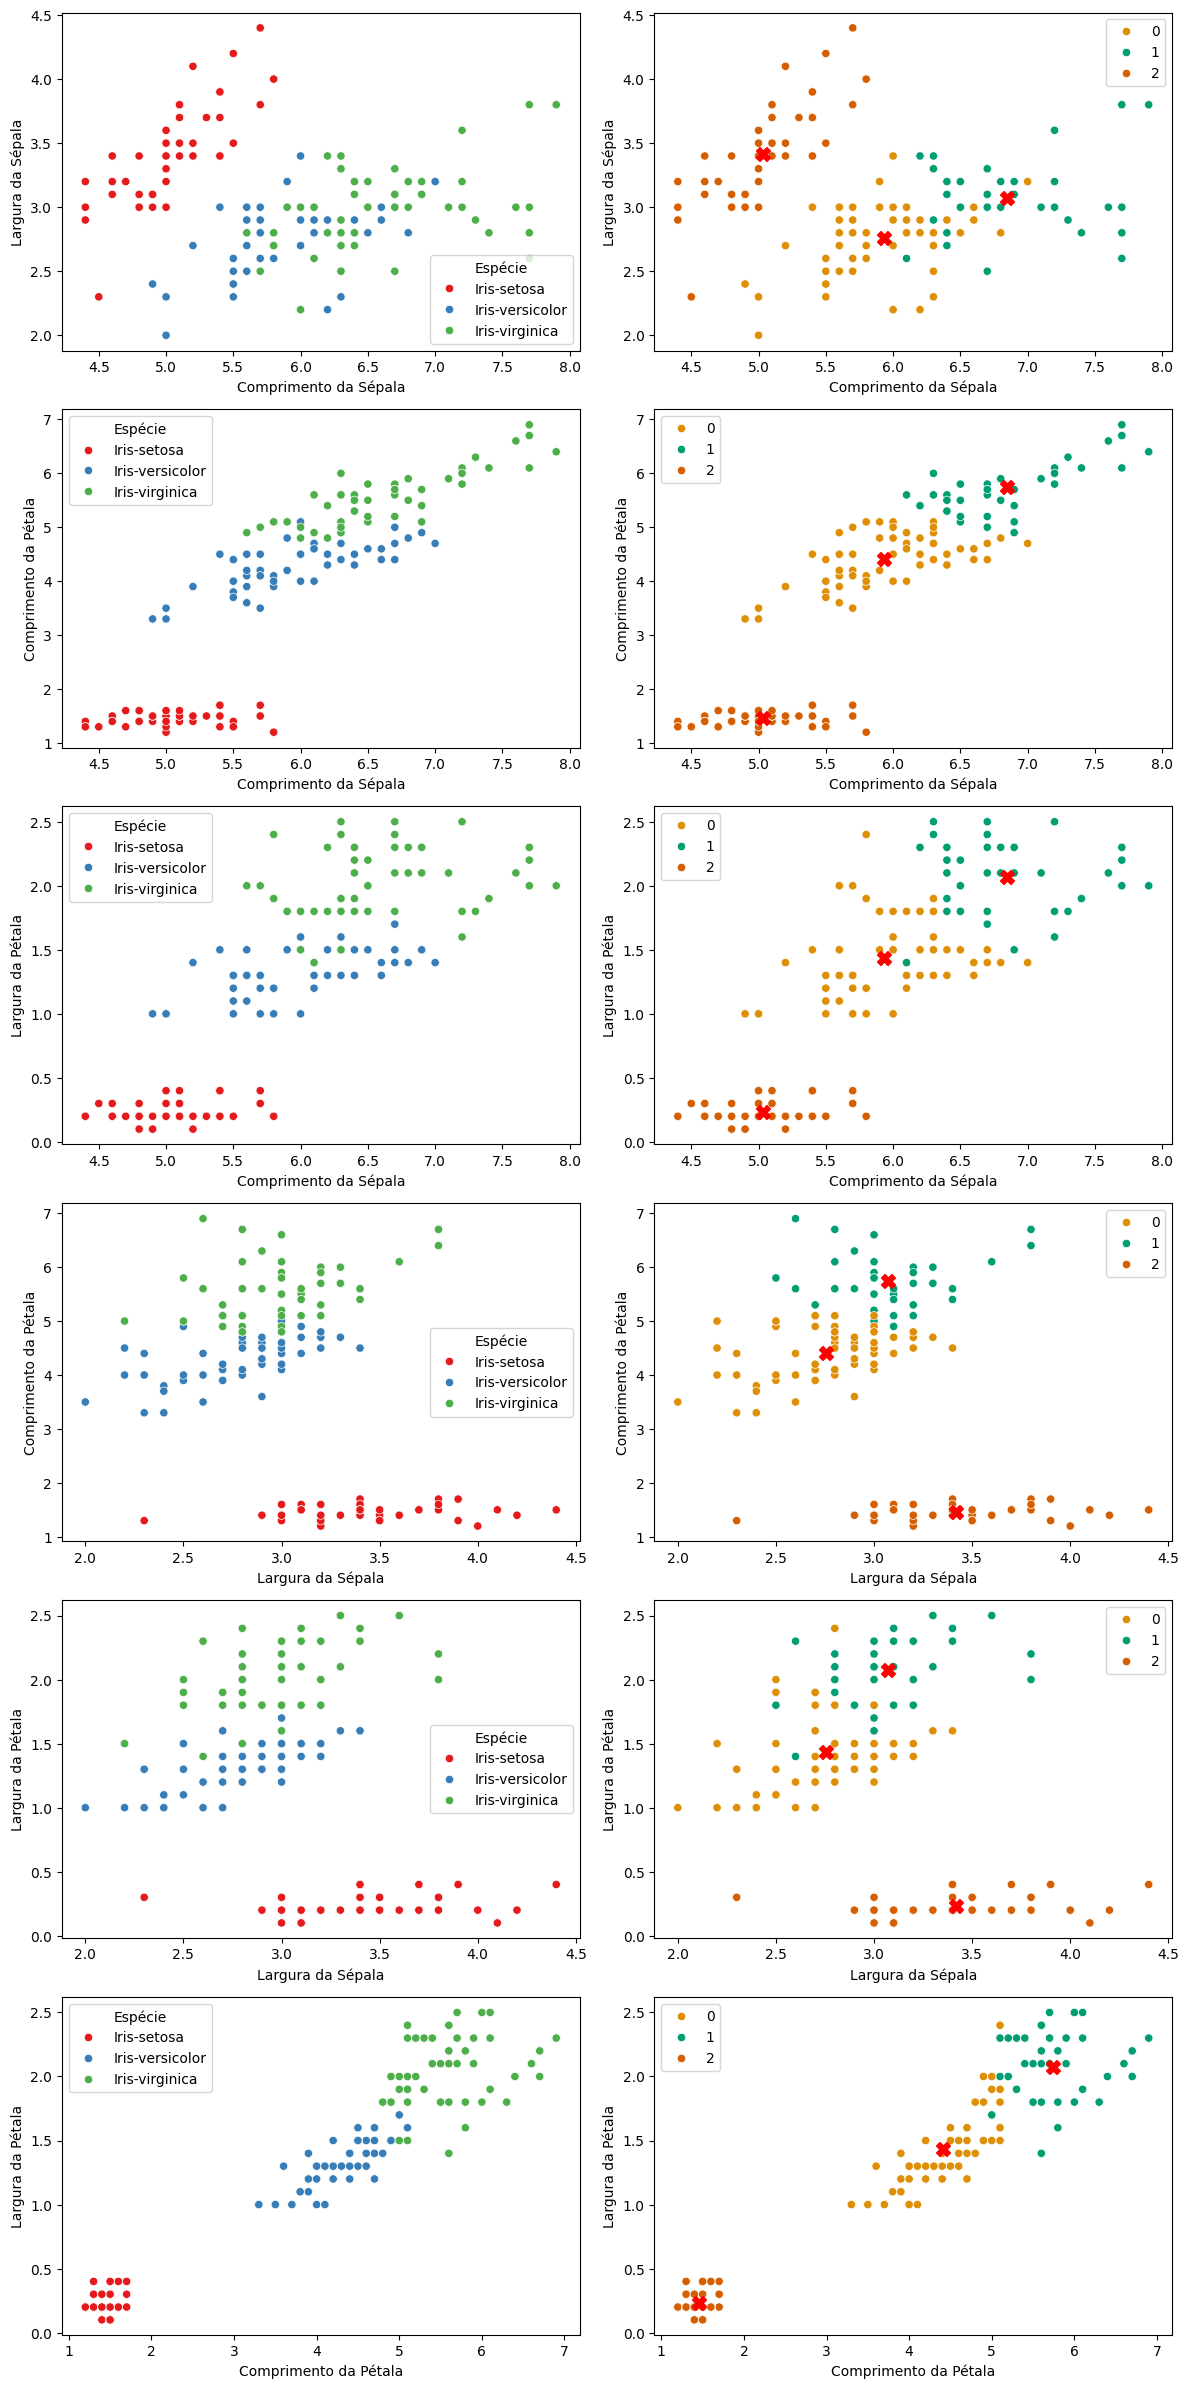

In [11]:
from itertools import combinations

features = XKMeans.columns
centroids = modelKMeans.cluster_centers_

#GERA AS COMBINAÇÕES COM 2 FEATURES
combinations = list(combinations(features, 2))

plt.figure(figsize=(12, len(combinations) * 4))

for index, (x_feature, y_feature) in enumerate(combinations, 1):
    #GRÁFICO REAL
    plt.subplot(len(combinations), 2, 2 * index - 1)
    sns.scatterplot(
        x=XKMeans[x_feature],
        y=XKMeans[y_feature],
        hue=datasetKMeansArrumado["Espécie"],
        palette="Set1"
    )
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)

    #GRÁFICO COM KMEANS
    plt.subplot(len(combinations), 2, 2 * index)
    sns.scatterplot(
        x=XKMeans[x_feature],
        y=XKMeans[y_feature],
        hue=YKMeans,
        palette=sns.color_palette("colorblind")[1:4]
    )
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)

    #CENTRÓIDES
    plt.scatter(
        centroids[:, features.get_loc(x_feature)],
        centroids[:, features.get_loc(y_feature)],
        s=100,
        c='red',
        marker='X',
    )

plt.tight_layout()
plt.show()

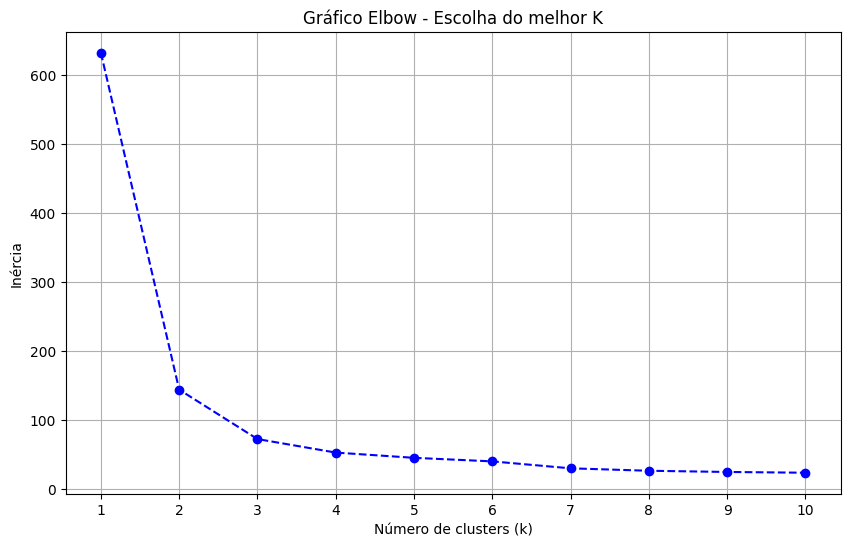

In [13]:
inertias = []

#TESTAR VALORES DE K DE 1 A 10
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(XKMeans)
    inertias.append(model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--', color='b')
plt.title('Gráfico Elbow - Escolha do melhor K')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()